# OSCILLAZIONI FORZATE

In [10]:
import numpy as np
import pandas as pd
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'oscillazioni_forzate_smorzate.csv'
fr = pd.read_csv(FILE)

omega = np.array(fr['omega'], dtype=np.float64) # rad/s omega è la frequenza nell'interpolazione
A = np.array(fr['A'], dtype=np.float64) * 0.01 # m

## interpolazione $A(\omega)$

$A(\omega) = \frac{M}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2\omega^2}}$

NOTA: vengono trascurati le incertezze sul valore di $\omega$, nel set di dati è riportato sia $\omega_f$ che $\omega$ misurato attraverso il periodo. Successivamente aggiungeremmo la trattazione dell'incertezza su $\omega$

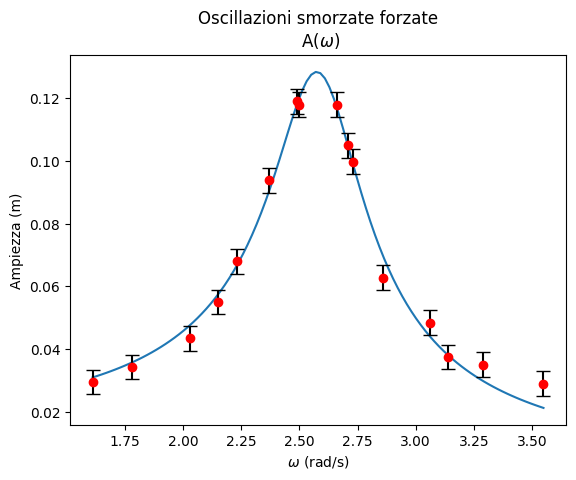

   
Parameters: {'M': 0.12881003724525417, 'w0': 2.58887356390202, 'gamma': 0.19422178121027237} 
Sigma parameters: {'M': 0.005143953789167937, 'w0': 0.007661535080966825, 'gamma': 0.011508558541894184}

sigmaY: 0.003936970682695273

covariance matrix: [[1.74679064e-05 5.01144356e-06 3.58116429e-05]
 [5.01144356e-06 3.87505908e-05 9.47120428e-06]
 [3.58116429e-05 9.47120428e-06 8.74356618e-05]]    

omega_0:  2.589 ± 0.008 
gamma:  0.194 ± 0.012 


In [11]:
from interpolazione3 import Interpolazione, final_val
from matplotlib import pyplot as plt

def A_w(w, M, w0, gamma):
    return M/np.sqrt((w0**2 - w**2)**2 + 4 * gamma**2 * w**2)

r = Interpolazione(omega,A,A_w,names=['M','w0','gamma'])

plt.plot(r.x_best, r.y_best)
plt.errorbar(omega,A,yerr=r.sigmaY,fmt='o',color='red',ecolor="black",capsize=5)
plt.title('Oscillazioni smorzate forzate\n A($\omega$)')
plt.ylabel("Ampiezza (m)")
plt.xlabel("$\omega$ (rad/s)")
plt.show()

print(r)
print('omega_0: ', final_val(r.bval['w0'],r.sigma_bval['w0'],decimals=3))
print('gamma: ', final_val(r.bval['gamma'],r.sigma_bval['gamma'],decimals=3))

# considerazioni sulla differenza tra l'$\omega_f$ e $\omega$

Osserviamo che la frequenza della forzante e la frequenza nell'interpolazione non coincidono. Nel grafico usiamo i valori di $\omega$ trascurandone l'incertezza. Quantifichiamo il valore di questa incertezza:

In [14]:
omega_f = np.array(fr['omegaf'])
omega = np.array(fr['omega'])
N = len(omega)

sigma_x = np.sqrt(np.sum((omega_f - omega)**2)/(N-1))
print('sigma_x: ',np.round(sigma_x,2))

sigma_x:  0.04
